In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict

import networkx as nx
import plotly.graph_objects as go

%matplotlib inline

### gets rid of the Matplotlib Deprecation Warning from the Graph
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

pd.set_option('display.max_colwidth', -1)
pd.set_option("display.max_rows",1500)

In [2]:
godfather_df = pd.read_json('cleaned_godfather.json').rename(columns = {0:'Role', 1: 'Line'})

In [3]:
godfather_df['Word Count'] = [len(x.split()) for x in godfather_df['Line']]

In [4]:
word_count_df = godfather_df.groupby(['Role'])['Word Count'].sum().reset_index(name = 'Word Count')

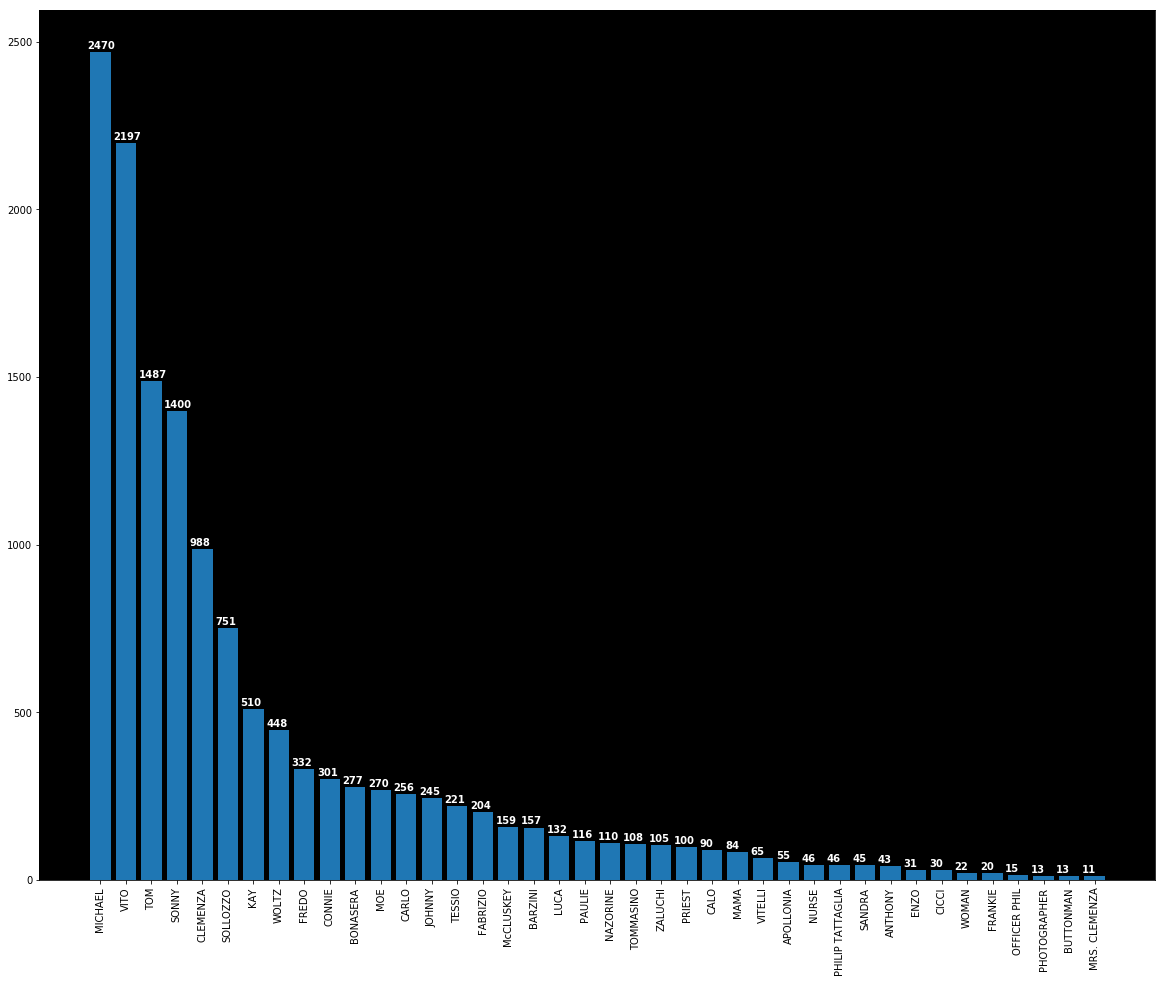

In [5]:
lst = ['CUT TO:', 'DISSOLVE TO:', 'FADE FROM BLACK:', 'OVERLAY:', 'PAN:', 'PAN RIGHT',
       'THE END', 'VOICE', 'VOICE ON THE PHONE']

removed = word_count_df[~word_count_df.Role.isin(lst)]
filtered = removed.loc[word_count_df['Word Count']>10]
# filtered['Word Count'] = np.log(filtered['Word Count'])

fig, ax = plt.subplots(1,1,figsize =(20,16))
sorted_df = filtered.sort_values('Word Count', ascending=False)#.plot('Role', 'Word Count', kind = 'bar')
plt.xticks(rotation=90)
plt.bar('Role', 'Word Count', data=sorted_df)
ax.set_facecolor('black')

for i, v in enumerate(sorted_df['Word Count']):
    plt.text(i-.5, v+10, str(v), color='white', fontweight='bold')

In [6]:
scenes_lst= []
index = 0
while index< len(godfather_df):
    person = godfather_df.iloc[index,0]
    
    scene = []
    while (':' not in person) and index< len(godfather_df)-1:
        scene.append(person)
        index+=1
        person = godfather_df.iloc[index,0]

    if (scene !=[]) and len(scene)!=1:
        scenes_lst.append(scene)
    index+=1

In [7]:
conversations_been_part_of = dict()
for i in scenes_lst:
    for j in pd.Series(i).value_counts().index:
        if j in conversations_been_part_of.keys():
            conversations_been_part_of[j]+=1
        else:
            conversations_been_part_of[j]= 1

In [8]:
in_order = sorted([list(tuple(conversations_been_part_of.items())[x])
                   for x in range(len(conversations_been_part_of))], key=lambda value: value[1], reverse=True)

over_one_scene = np.array([x for x in in_order if x[1]>1])
over_one_scene_df = pd.DataFrame({'Role':over_one_scene[:,0],'Scene':over_one_scene[:,1].astype(int) })

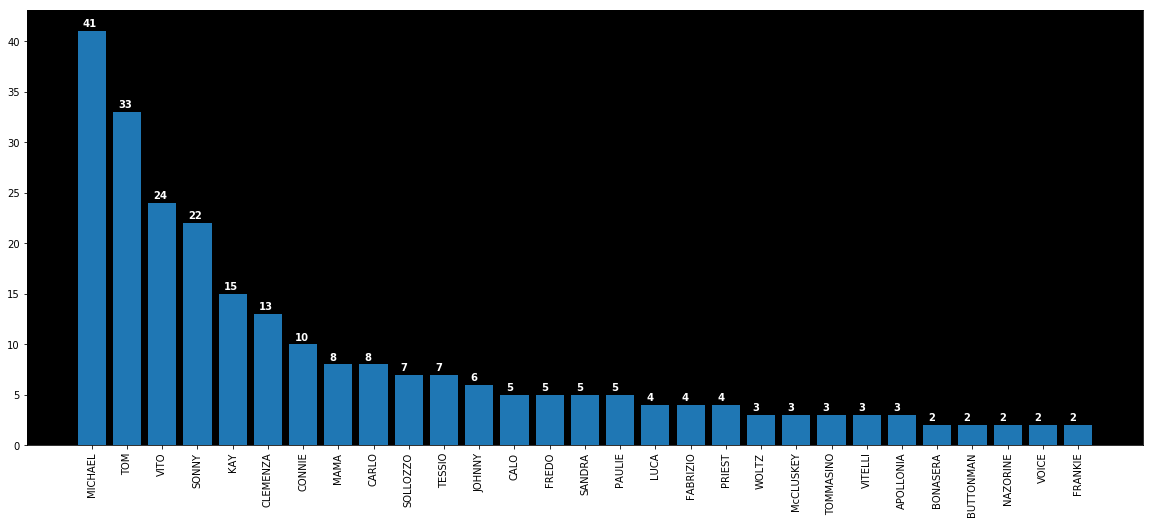

In [9]:
fig, ax = plt.subplots(1,1,figsize =(20,8))
sorted_df = over_one_scene_df.sort_values('Scene', ascending=False)#.plot('Role', 'Scene', kind = 'bar')
plt.xticks(rotation=90)
plt.bar('Role', 'Scene', data= sorted_df)
ax.set_facecolor('black')

for i, v in enumerate(sorted_df['Scene']):
    plt.text(i-.25, v+.4, str(v), color='white', fontweight='bold')

In [59]:
edge_dict = {}
for scene in scenes_lst:
    unique = pd.Series(scene).unique()
    for i in range(len(unique)):
        for j in range(i+1, len(unique)):
            combo = unique[i]+'-'+unique[j] if unique[i] < unique[j] else unique[j]+'-'+unique[i]
            if combo in edge_dict.keys():
                edge_dict[combo]+=len([x for x in scene if x==unique[i]])
            else:
                edge_dict[combo]=len([x for x in scene if x==unique[i]])

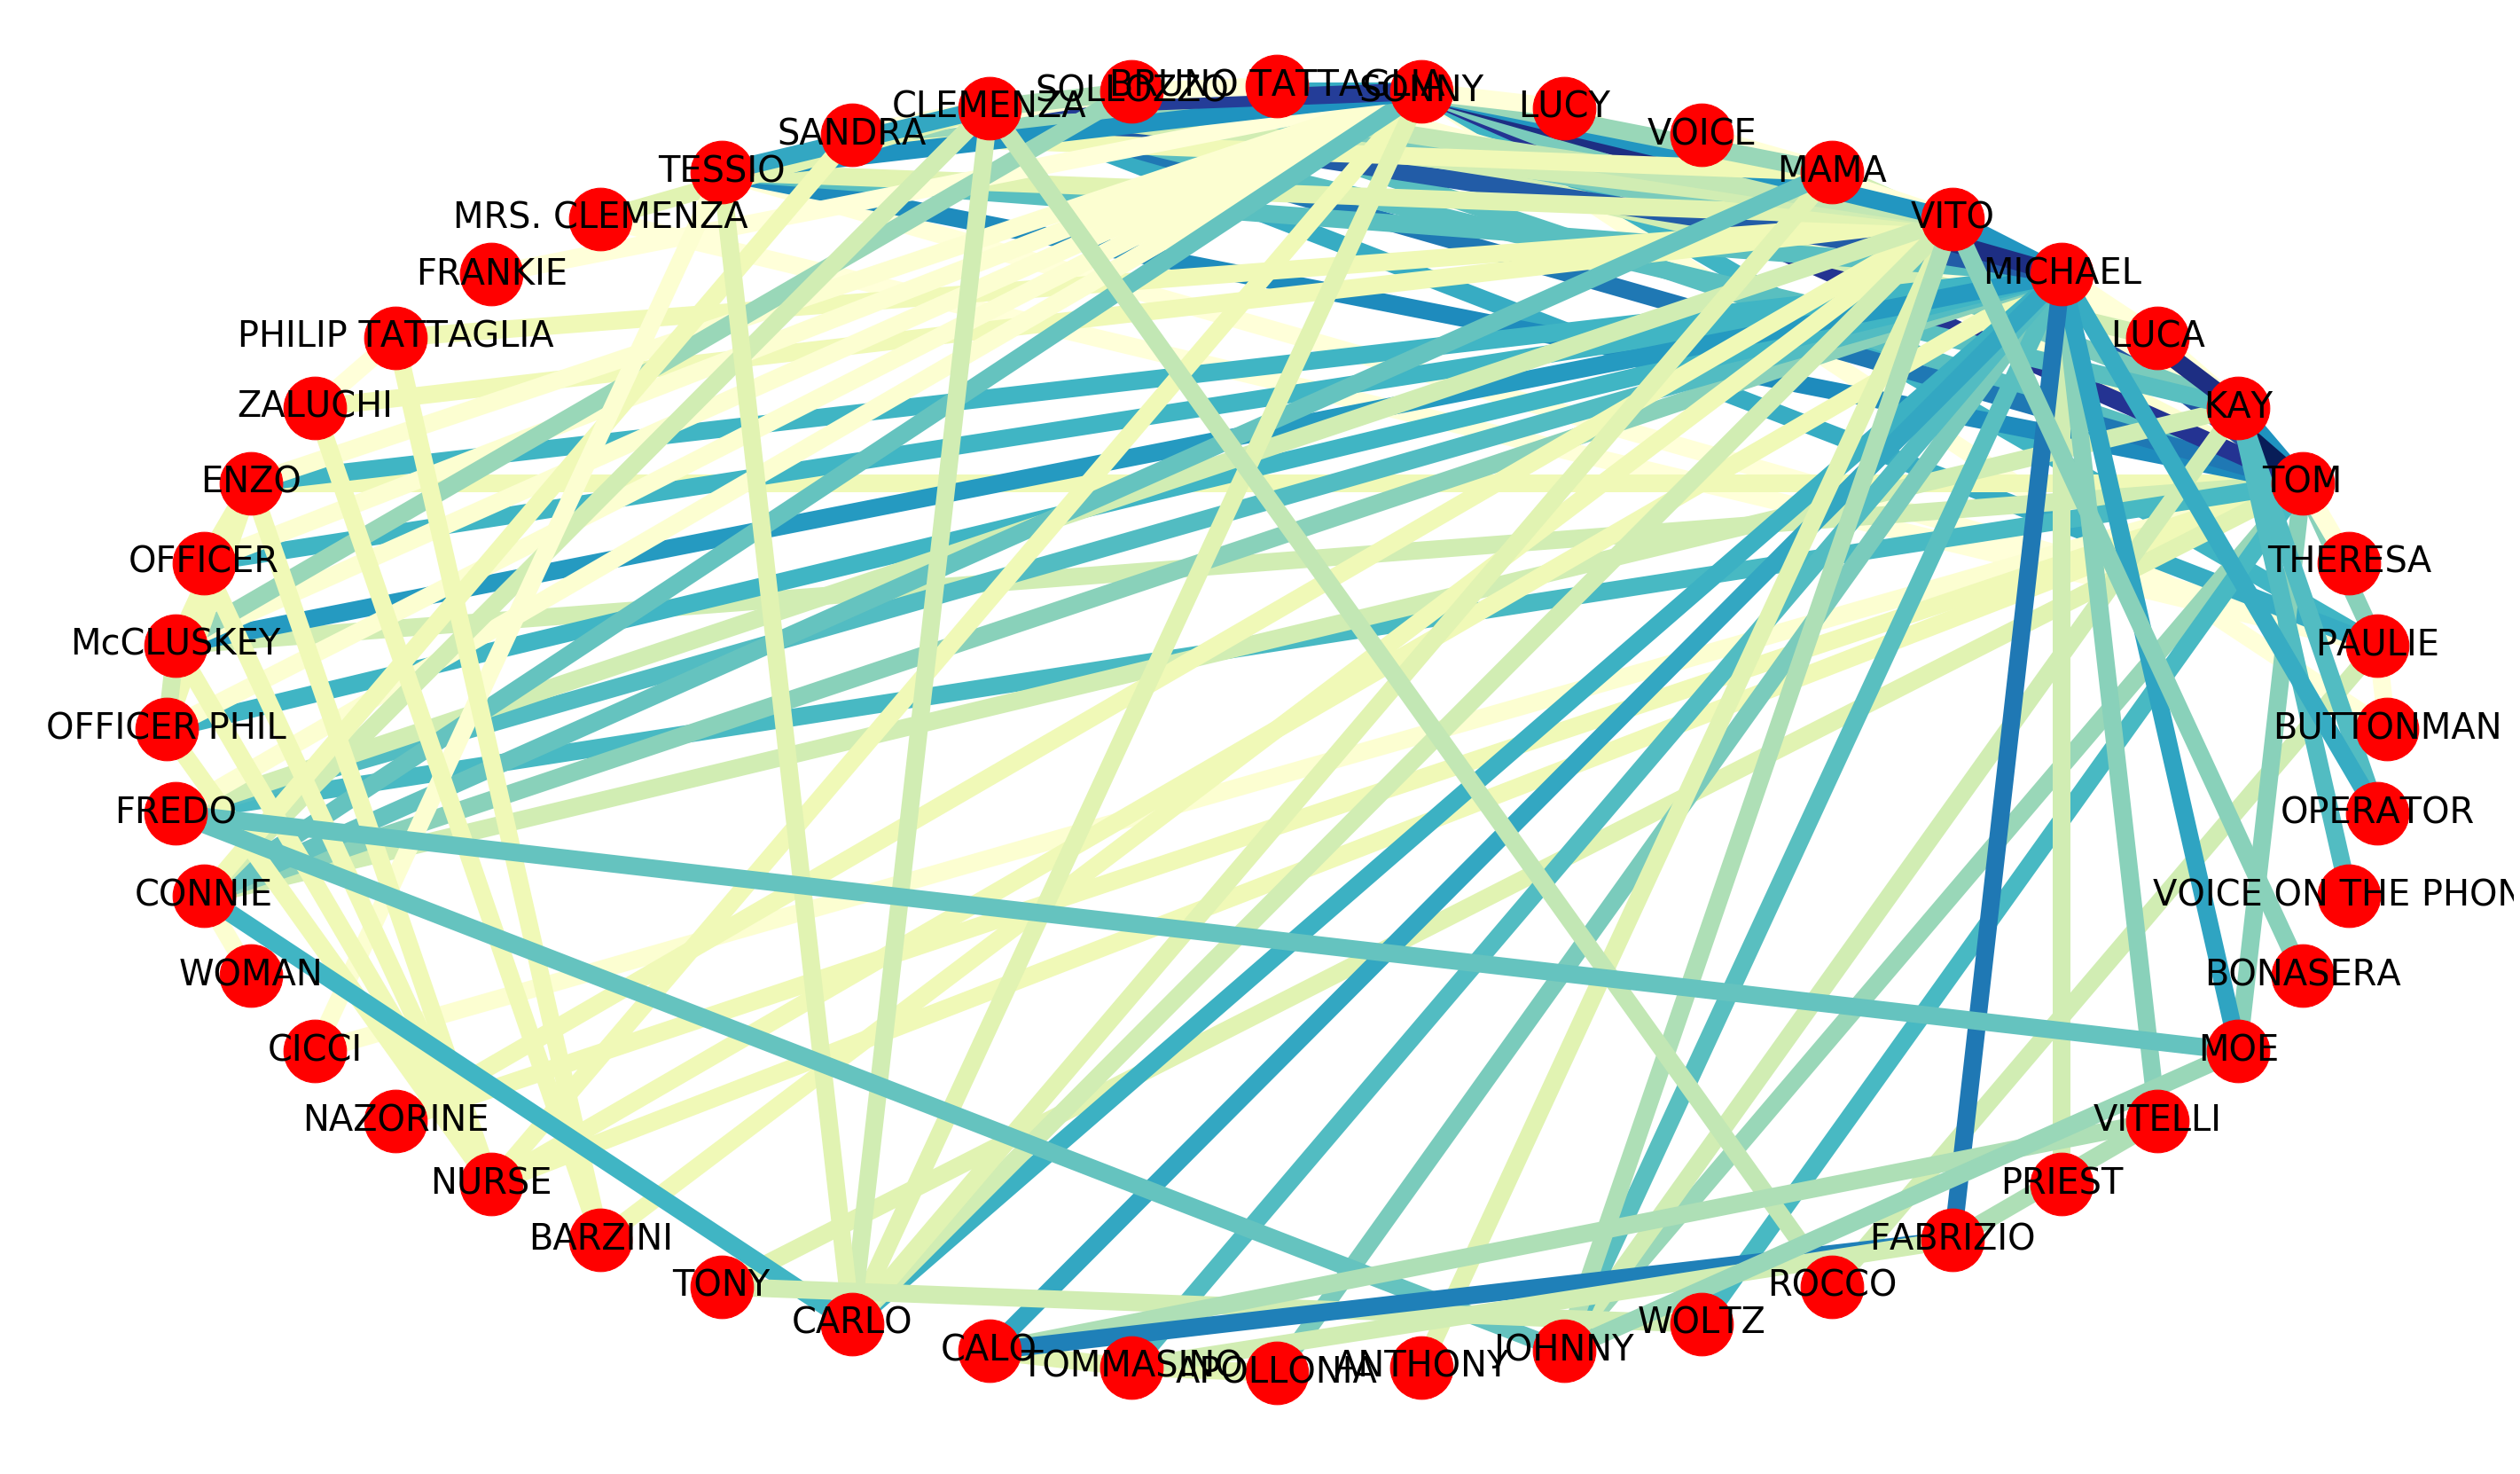

In [73]:
G = nx.Graph()
fig, ax = plt.subplots(1,1, figsize=(50,30))

edge_dict=a

for i in edge_dict.keys():
    split = i.split('-')
    G.add_edge(split[0],split[1])

### since edges changes the order of edges from the way they are added
#logged values to see more subtule relationships
weights = [np.log(float(edge_dict[x+'-'+y])) if x<y else np.log(float(edge_dict[y+'-'+x])) for x,y in G.edges()]

nx.draw_circular(G, with_labels=True, width= 20, ax=ax, font_size = 40, node_size = 5000, edge_cmap = plt.cm.YlGnBu,
                edge_color = weights,edge_vmin=1, edge_vmax= np.log(max(edge_dict.values())))

plt.show()

In [69]:
x = sorted(edge_dict, key = lambda x: edge_dict[x], reverse= False)

In [70]:
from collections import OrderedDict
a = OrderedDict()

In [71]:
for item in x:
    if edge_dict[item]>1:
        a[item] = edge_dict[item]

In [72]:
a

OrderedDict([('BUTTONMAN-PAULIE', 2),
             ('THERESA-TOM', 2),
             ('KAY-LUCA', 2),
             ('LUCA-MICHAEL', 2),
             ('LUCA-VITO', 2),
             ('MAMA-VOICE', 2),
             ('VITO-VOICE', 2),
             ('LUCY-SONNY', 2),
             ('KAY-MAMA', 2),
             ('BRUNO TATTAGLIA-LUCA', 2),
             ('BRUNO TATTAGLIA-SOLLOZZO', 2),
             ('CLEMENZA-SANDRA', 2),
             ('SANDRA-SOLLOZZO', 2),
             ('PAULIE-TESSIO', 2),
             ('MRS. CLEMENZA-PAULIE', 2),
             ('FRANKIE-SONNY', 2),
             ('BUTTONMAN-SONNY', 2),
             ('PHILIP TATTAGLIA-ZALUCHI', 2),
             ('LUCY-TOM', 3),
             ('ENZO-SONNY', 3),
             ('OFFICER-SONNY', 3),
             ('McCLUSKEY-SONNY', 3),
             ('OFFICER PHIL-SONNY', 3),
             ('FREDO-SONNY', 3),
             ('CONNIE-WOMAN', 3),
             ('CICCI-TESSIO', 3),
             ('CICCI-TOM', 3),
             ('LUCA-TOM', 4),
             ('